<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT306 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [3]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data_df = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data_df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:

1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?

En la gráficos se puede notar que la concentración de los datos siguen una densidad similar. 
1. Grupo I: Se infiere un relación lineal positiva entre x e y

2. Grupo II: Se infiere una relación polinomica de grado dos entre las variables.

3. Grupo III: Se infiere una relación lineal positiva, donde proponer una relación lineal se presenta un outlier a analizar.

4. Grupo IV: Se infiere que la variable independiente viene dada por y en vez de x.

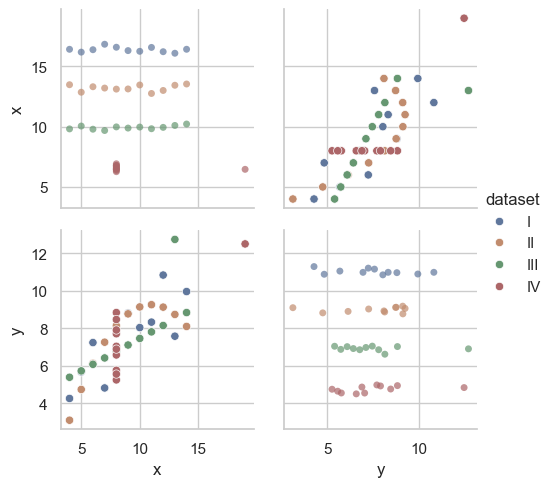

In [21]:
# FIXME
g = sns.PairGrid(data_df, hue="dataset")
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.stripplot, dodge=True, alpha=0.7)  # o sns.rugplot
g.add_legend()

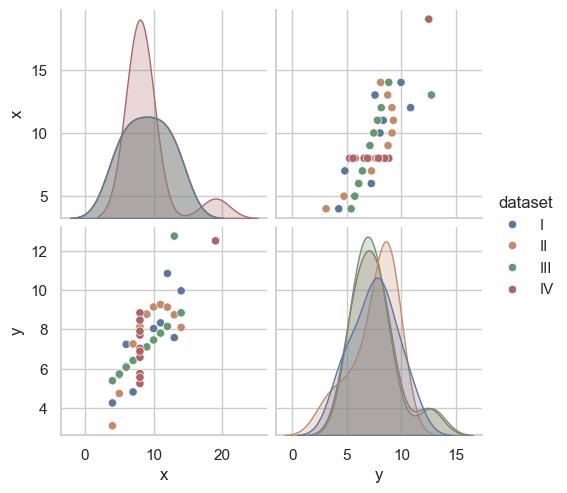

In [20]:
sns.pairplot(data_df, hue='dataset')
#sns.pairplot(data_df, hue="dataset", diag_kind="hist")

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


En términos de media muestral, varianza, los grupos I al IV son prácticamente indistinguibles, lo cual nos indica que no es recomendable sólo considerar estás estadísticas a la hora de realizar un análisis, pues no se considera el tipo de relación que tienen las variables entre sí, ni si existen puntos alejados del comportamiento mayoritario de los datos.

In [36]:
data_df.groupby("dataset")[["x","y"]].describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.

En este conjunto (cuarteto de Anscombe), los cuatro grupos entregan MSE y R² muy similares bajo una recta, por lo que en términos de las métricas mencionadas los ajustes son indistinguibles. Para analizar más la calidad del ajuste se porpone analizar los supuestos del modelo lineal.


Grupo I
  Intercepto (a): 3.0001
  Pendiente  (b): 0.5001
  MSE: 1.2512
  R² : 0.6665


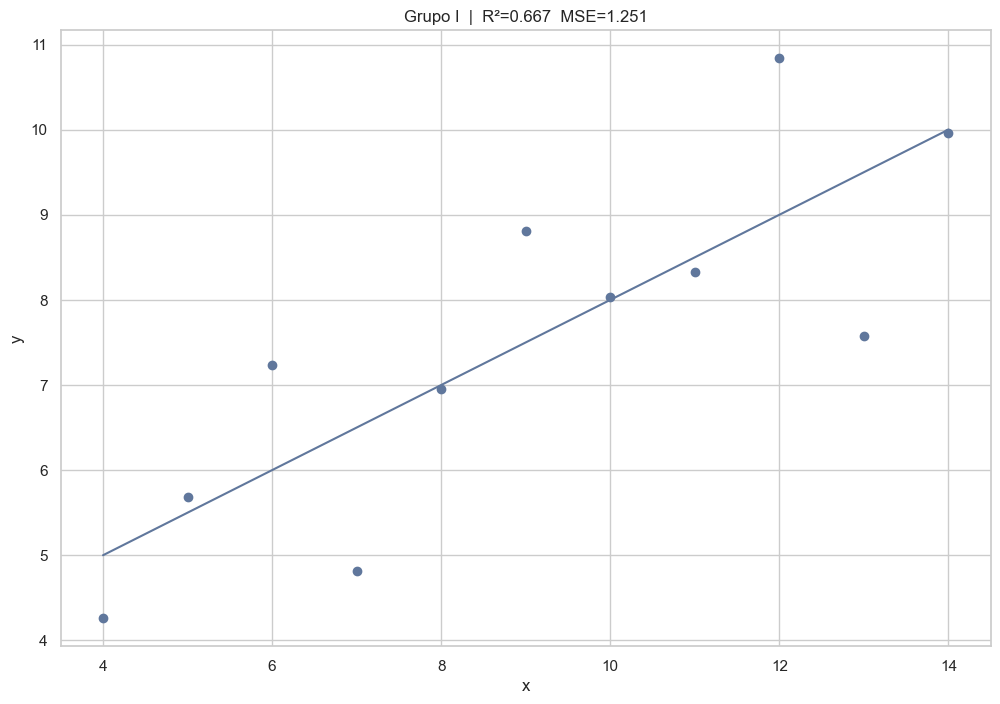


Grupo II
  Intercepto (a): 3.0009
  Pendiente  (b): 0.5000
  MSE: 1.2524
  R² : 0.6662


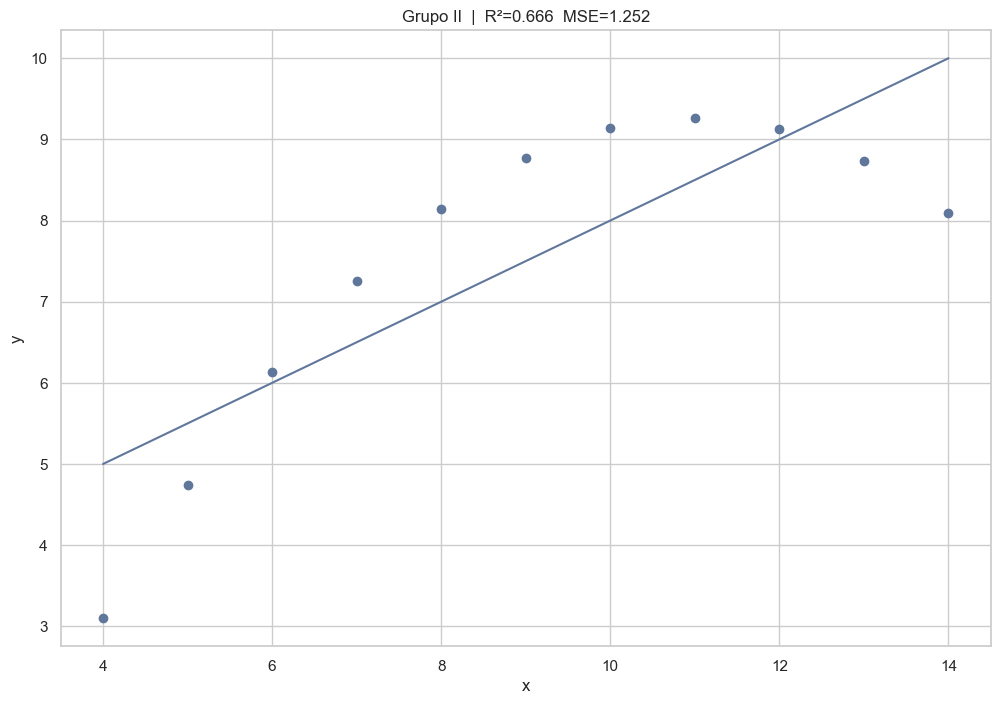


Grupo III
  Intercepto (a): 3.0025
  Pendiente  (b): 0.4997
  MSE: 1.2506
  R² : 0.6663


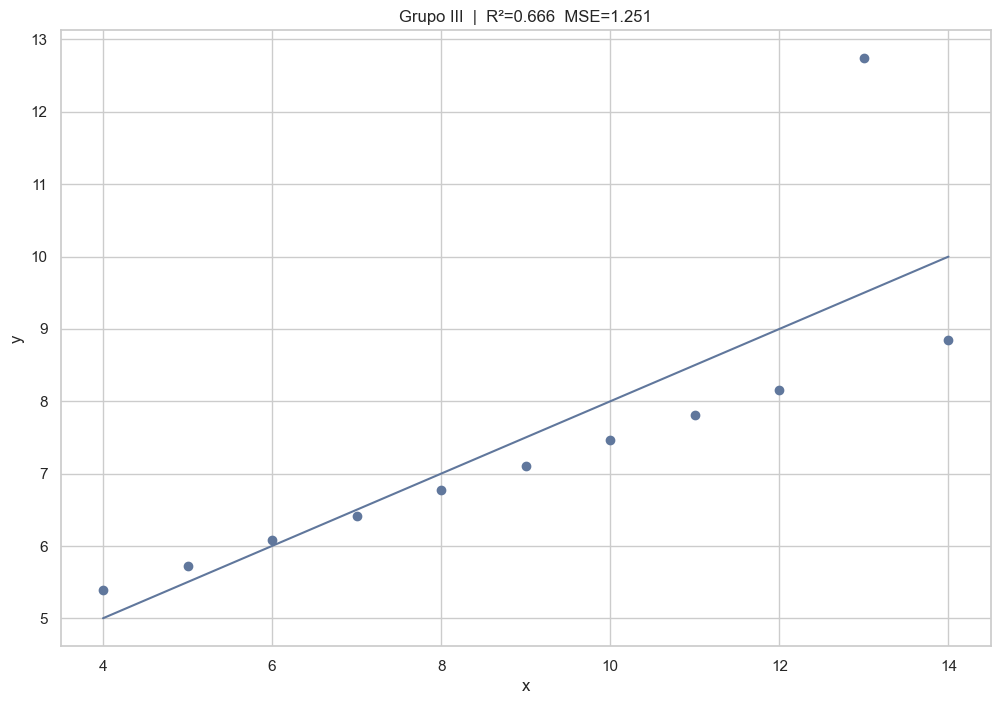


Grupo IV
  Intercepto (a): 3.0017
  Pendiente  (b): 0.4999
  MSE: 1.2493
  R² : 0.6667


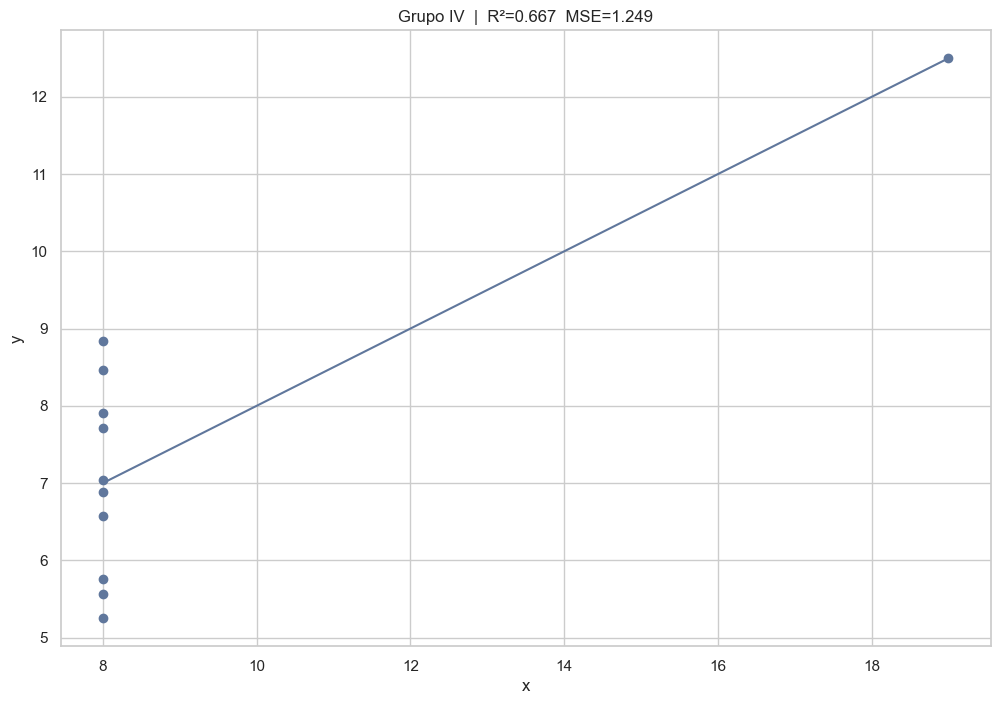

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# data_df debe tener columnas: ["dataset", "x", "y"]

for nombre_grupo, gdf in data_df.groupby("dataset"):
    # --- 1) Ajuste lineal y = a + b x ---
    X = gdf[["x"]].values          # (n, 1)
    y = gdf["y"].values            # (n,)
    modelo = LinearRegression().fit(X, y)

    # --- 2) Métricas ---
    y_hat = modelo.predict(X)
    mse = mean_squared_error(y, y_hat)
    r2  = r2_score(y, y_hat)

    print(f"\nGrupo {nombre_grupo}")
    print(f"  Intercepto (a): {modelo.intercept_:.4f}")
    print(f"  Pendiente  (b): {modelo.coef_[0]:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R² : {r2:.4f}")

    # --- 3) Gráfico: puntos + recta ---
    plt.figure()
    plt.scatter(gdf["x"], gdf["y"])
    xs = np.linspace(gdf["x"].min(), gdf["x"].max(), 100).reshape(-1, 1)
    ys = modelo.predict(xs)
    plt.plot(xs, ys)
    plt.title(f"Grupo {nombre_grupo}  |  R²={r2:.3f}  MSE={mse:.3f}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.show()


4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

I: OLS (y~x) razonable (R²≈0.67), pero aún queda varianza; útil revisar residuos por curvatura/abanico.
II: Cuadrático capta la no linealidad (R²≈1, MSE≈0) → mejora clara frente al lineal.
III: Eliminar 1 outlier por Cook y usar WLS ($R^2\approx 1$) corrige influencia/heterocedasticidad.
IV: Relación casi vertical → invertir a x~y y remover 1 por Cook; queda esencialmente x=8 con un $R^2\approx 1$

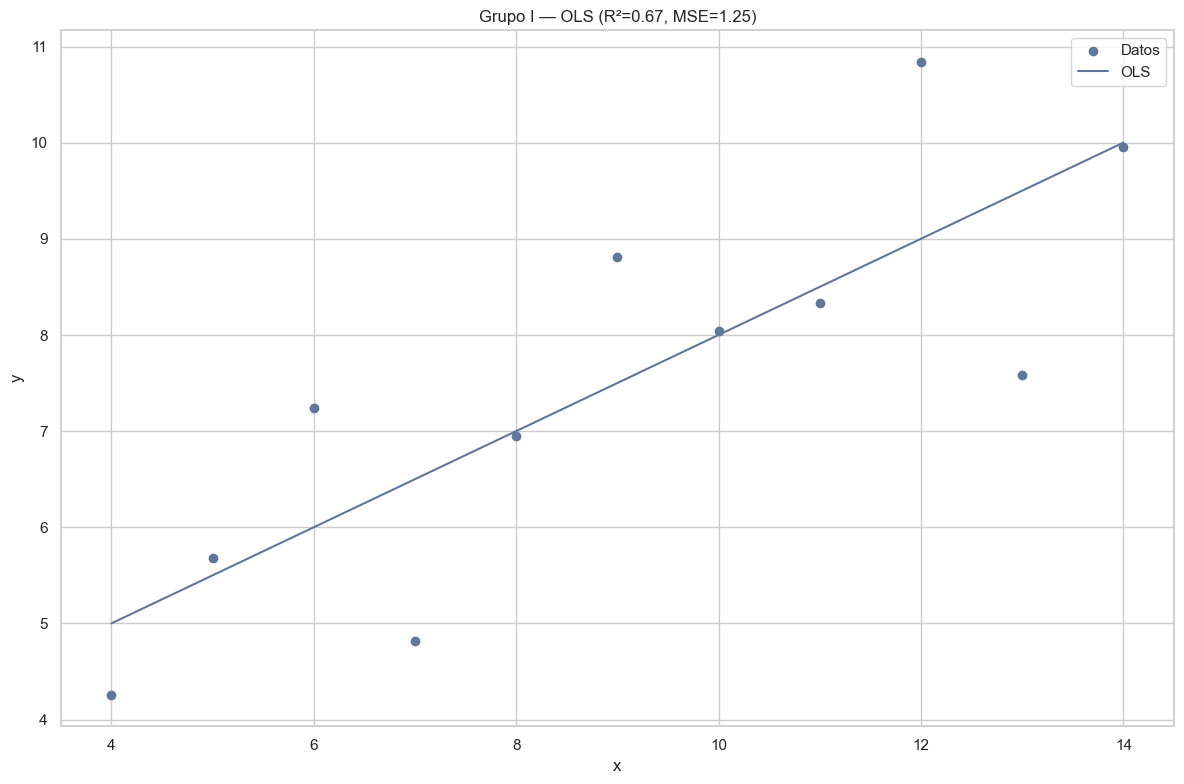

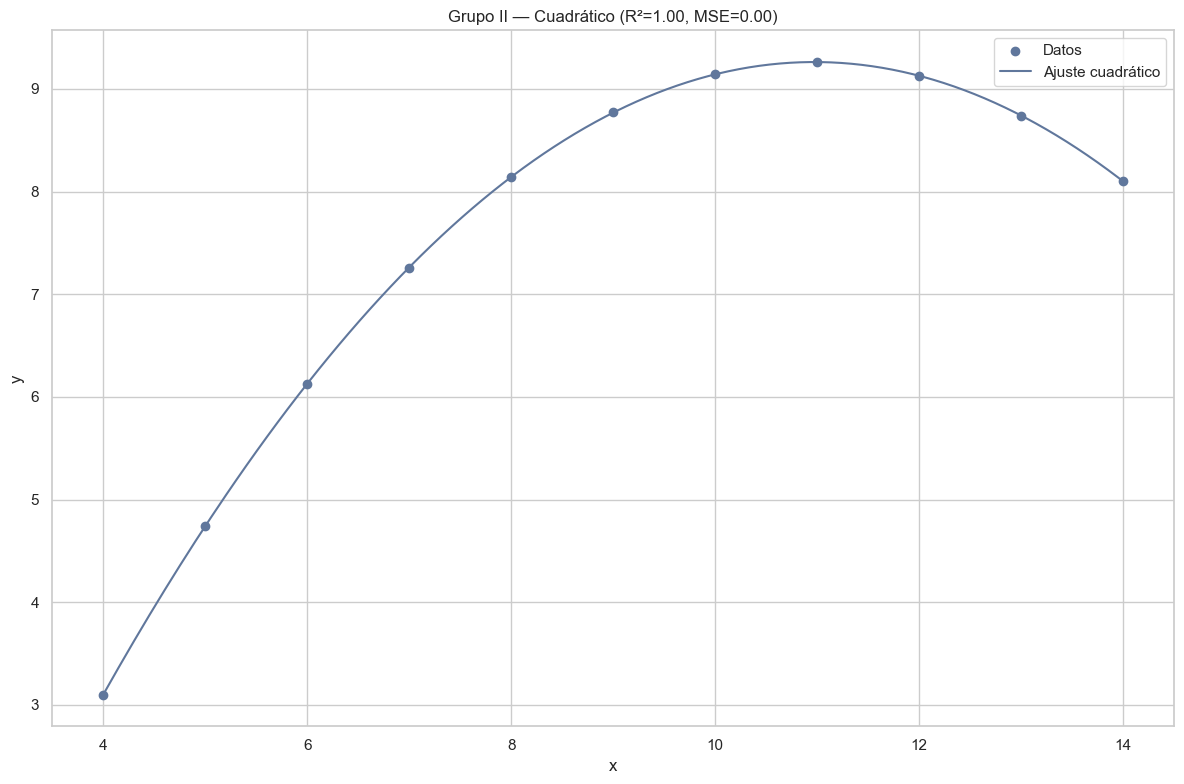

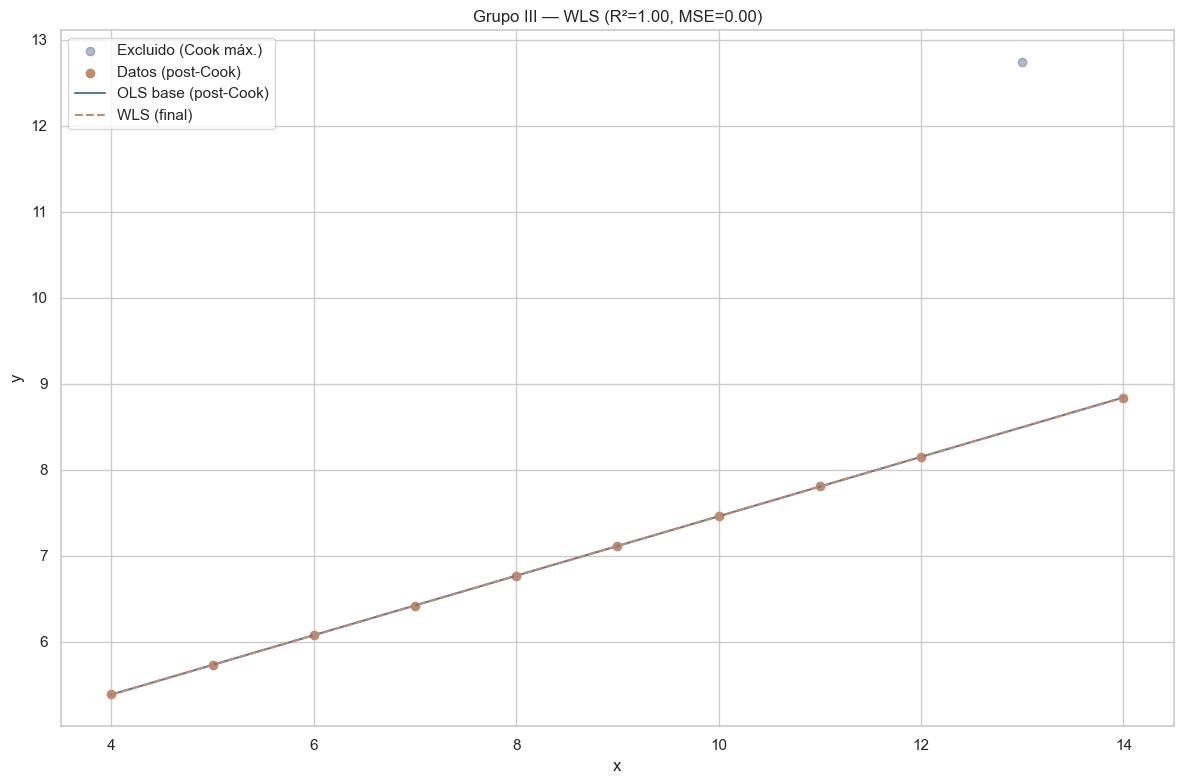

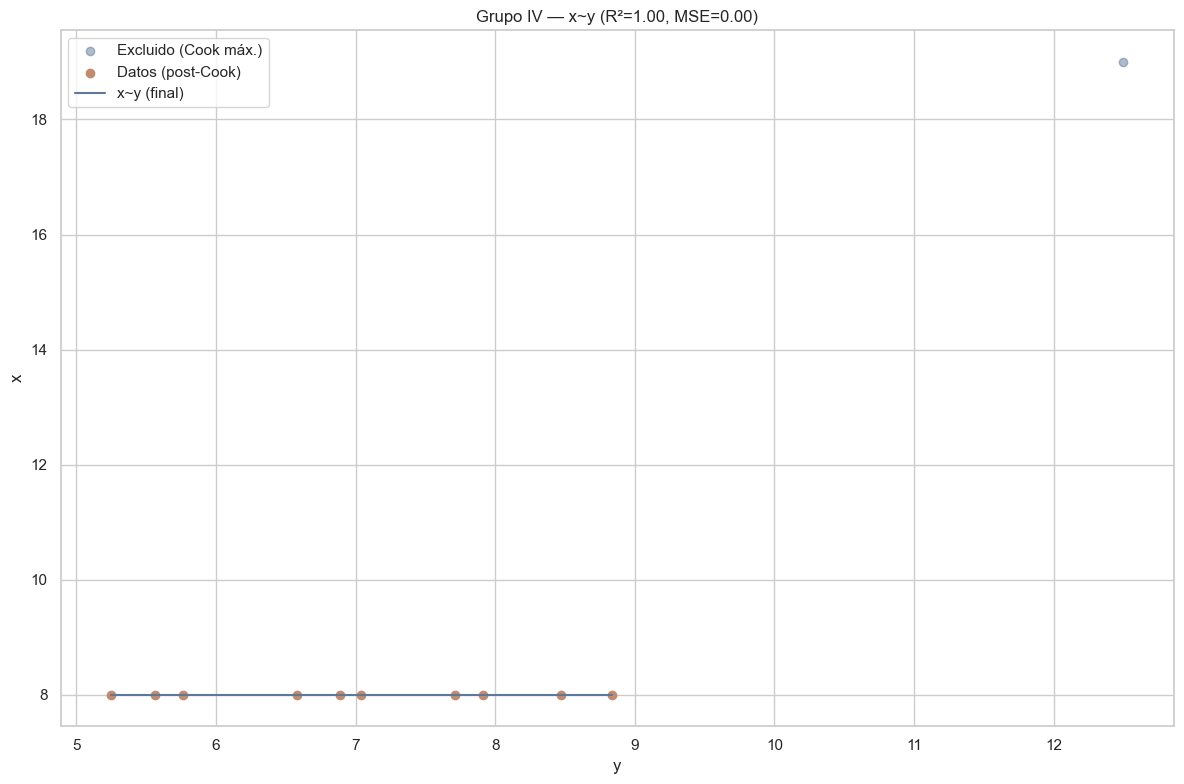

grupo                                             modelo  intercepto  pendiente      MSE       R2  n     b1_x     b2_x2
    I                                          OLS (y~x)    3.000091   0.500091 1.251154 0.666542 11      NaN       NaN
   II                               Cuadrático (y~x+x^2)   -5.995734        NaN 0.000002 0.999999 11 2.780839 -0.126713
  III WLS (y~x, pesos Cook) [1 punto eliminado por Cook]    4.005632   0.345381 0.000008 0.999993 10      NaN       NaN
   IV   OLS invertido (x~y) [1 punto eliminado por Cook]    8.000000   0.000000 0.000000 1.000000 10      NaN       NaN


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------------------------------------------
# Helper: distancia de Cook para un modelo lineal con intercepto
# X: matriz de diseño (sin intercepto); y: vector objetivo
# Devuelve: D (vector con Cook) y el índice (posicional) del peor punto
# ------------------------------------------------------------
def cooks_distance(X, y, eps=1e-8):
    # OLS base
    ols = LinearRegression().fit(X, y)
    y_hat = ols.predict(X)
    r = y - y_hat
    n = len(y)
    p = X.shape[1] + 1  # +1 por intercepto

    # Matriz de diseño con intercepto
    X_aug = np.c_[np.ones(n), X]
    XtX = X_aug.T @ X_aug
    XtX_inv = np.linalg.pinv(XtX)  # pinv por estabilidad numérica

    # Leverages h_ii
    H_rows = X_aug @ XtX_inv
    h = np.sum(H_rows * X_aug, axis=1)
    h = np.clip(h, 0.0, 1.0 - eps)

    # MSE OLS (usa n-p si hay suficientes datos; si no, fallback)
    sse = np.sum(r**2)
    denom_df = max(n - p, 1)
    mse_ols = max(sse / denom_df, eps)

    # Cook: D_i = (r_i^2 / (p * MSE)) * (h_i / (1 - h_i)^2)
    denom = (1.0 - h)**2
    denom[denom < eps] = eps
    D = (r**2 / (p * mse_ols)) * (h / denom)

    worst_pos = int(np.argmax(D))  # posición (0..n-1) del peor
    return D, worst_pos

# ------------------------------------------------------------
# data_df: columnas ['dataset','x','y']
# ------------------------------------------------------------
res_filas = []

for nombre_grupo, gdf in data_df.groupby("dataset"):
    # Asegura índice posicional limpio para poder dropear por posición
    gdf = gdf.reset_index(drop=True).copy()

    # -------------------------------
    # GRUPO I: OLS (y ~ x)
    # -------------------------------
    if nombre_grupo == "I":
        gdf_fit = gdf.copy()

        X = gdf_fit[["x"]].values
        y = gdf_fit["y"].values

        ols = LinearRegression().fit(X, y)
        y_hat = ols.predict(X)
        mse = mean_squared_error(y, y_hat)
        r2  = r2_score(y, y_hat)

        res_filas.append({
            "grupo": "I", "modelo": "OLS (y~x)",
            "intercepto": ols.intercept_, "pendiente": ols.coef_[0],
            "MSE": mse, "R2": r2, "n": len(gdf_fit)
        })

        # Plot
        plt.figure()
        plt.scatter(gdf_fit["x"], gdf_fit["y"], label="Datos")
        xs = np.linspace(gdf_fit["x"].min(), gdf_fit["x"].max(), 200).reshape(-1,1)
        plt.plot(xs, ols.predict(xs), label="OLS")
        plt.title(f"Grupo I — OLS (R²={r2:.2f}, MSE={mse:.2f})")
        plt.xlabel("x"); plt.ylabel("y")
        plt.legend(); plt.tight_layout()
        plt.show()

    # -------------------------------
    # GRUPO II: Cuadrático (y ~ x + x^2)
    # -------------------------------
    elif nombre_grupo == "II":
        gdf_fit = gdf.copy()

        X1 = gdf_fit[["x"]].values
        X = np.c_[X1, X1**2]
        y = gdf_fit["y"].values

        quad = LinearRegression().fit(X, y)
        y_hat = quad.predict(X)
        mse = mean_squared_error(y, y_hat)
        r2  = r2_score(y, y_hat)

        a = quad.intercept_
        b1, b2 = quad.coef_

        res_filas.append({
            "grupo": "II", "modelo": "Cuadrático (y~x+x^2)",
            "intercepto": a, "b1_x": b1, "b2_x2": b2,
            "MSE": mse, "R2": r2, "n": len(gdf_fit)
        })

        # Plot
        plt.figure()
        plt.scatter(gdf_fit["x"], gdf_fit["y"], label="Datos")
        xs = np.linspace(gdf_fit["x"].min(), gdf_fit["x"].max(), 200).reshape(-1,1)
        xs_quad = np.c_[xs, xs**2]
        plt.plot(xs, quad.predict(xs_quad), label="Ajuste cuadrático")
        plt.title(f"Grupo II — Cuadrático (R²={r2:.2f}, MSE={mse:.2f})")
        plt.xlabel("x"); plt.ylabel("y")
        plt.legend(); plt.tight_layout()
        plt.show()

    # -------------------------------
    # GRUPO III: WLS (y ~ x) con eliminación por Cook
    #   1) Calcula Cook en OLS base
    #   2) Elimina el peor punto
    #   3) Recalcula pesos Cook y ajusta WLS
    # -------------------------------
    elif nombre_grupo == "III":
        # Paso 1: Cook sobre OLS base (y~x)
        X0 = gdf[["x"]].values
        y0 = gdf["y"].values
        D0, worst_pos = cooks_distance(X0, y0)
        gdf_fit = gdf.drop(gdf.index[worst_pos]).reset_index(drop=True).copy()

        # Paso 2–3: WLS en datos filtrados (pesos con Cook recomputado)
        X = gdf_fit[["x"]].values
        y = gdf_fit["y"].values

        # OLS base para pesos
        base = LinearRegression().fit(X, y)
        y_hat = base.predict(X)

        # Cook para pesos
        D, _ = cooks_distance(X, y)
        w = 1.0 / (1.0 + D)

        # WLS final
        wls = LinearRegression().fit(X, y, sample_weight=w)
        y_hat_w = wls.predict(X)
        mse = mean_squared_error(y, y_hat_w)
        r2  = r2_score(y, y_hat_w)

        res_filas.append({
            "grupo": "III",
            "modelo": "WLS (y~x, pesos Cook) [1 punto eliminado por Cook]",
            "intercepto": wls.intercept_, "pendiente": wls.coef_[0],
            "MSE": mse, "R2": r2, "n": len(gdf_fit)
        })

        # Plot (mostramos el excluido en gris para referencia)
        plt.figure()
        # punto excluido:
        plt.scatter([gdf.loc[worst_pos, "x"]], [gdf.loc[worst_pos, "y"]],
                    label="Excluido (Cook máx.)", alpha=0.5)
        # datos usados:
        plt.scatter(gdf_fit["x"], gdf_fit["y"], label="Datos (post-Cook)")
        xs = np.linspace(gdf_fit["x"].min(), gdf_fit["x"].max(), 200).reshape(-1,1)
        plt.plot(xs, base.predict(xs), label="OLS base (post-Cook)")
        plt.plot(xs, wls.predict(xs), label="WLS (final)", linestyle="--")
        plt.title(f"Grupo III — WLS (R²={r2:.2f}, MSE={mse:.2f})")
        plt.xlabel("x"); plt.ylabel("y")
        plt.legend(); plt.tight_layout()
        plt.show()

    # -------------------------------
    # GRUPO IV: invertir dependencia → x ~ y
    #   1) Calcula Cook en OLS base (x~y)
    #   2) Elimina el peor punto
    #   3) Ajusta OLS final x~y
    # -------------------------------
    elif nombre_grupo == "IV":
        # Paso 1: Cook con predictores = y y objetivo = x
        X0 = gdf[["y"]].values
        x0 = gdf["x"].values
        D0, worst_pos = cooks_distance(X0, x0)
        gdf_fit = gdf.drop(gdf.index[worst_pos]).reset_index(drop=True).copy()

        # Paso 2–3: OLS final en datos filtrados
        X = gdf_fit[["y"]].values
        x = gdf_fit["x"].values

        reg_xy = LinearRegression().fit(X, x)
        x_hat = reg_xy.predict(X)
        mse = mean_squared_error(x, x_hat)
        r2  = r2_score(x, x_hat)

        res_filas.append({
            "grupo": "IV",
            "modelo": "OLS invertido (x~y) [1 punto eliminado por Cook]",
            "intercepto": reg_xy.intercept_, "pendiente": reg_xy.coef_[0],
            "MSE": mse, "R2": r2, "n": len(gdf_fit)
        })

        # Plot (mostramos el excluido en gris)
        plt.figure()
        plt.scatter([gdf.loc[worst_pos, "y"]], [gdf.loc[worst_pos, "x"]],
                    label="Excluido (Cook máx.)", alpha=0.5)
        plt.scatter(gdf_fit["y"], gdf_fit["x"], label="Datos (post-Cook)")
        ys = np.linspace(gdf_fit["y"].min(), gdf_fit["y"].max(), 200).reshape(-1,1)
        plt.plot(ys, reg_xy.predict(ys), label="x~y (final)")
        plt.title(f"Grupo IV — x~y (R²={r2:.2f}, MSE={mse:.2f})")
        plt.xlabel("y"); plt.ylabel("x")
        plt.legend(); plt.tight_layout()
        plt.show()

# Resumen
resumen = pd.DataFrame(res_filas).sort_values("grupo")
print(resumen.to_string(index=False))
